In [1]:
#importing nessasary library
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("scholarship.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   semester_percentage     1000 non-null   float64
 1   scholarship_exam_marks  1000 non-null   int64  
 2   got_scholarship         1000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [4]:
data.describe()

,semester_percentage,scholarship_exam_marks,got_scholarship
count,1000.000000,1000.000000,1000.000000
mean,69.612400,32.225000,0.489000
std,6.158979,19.130822,0.500129
min,48.900000,0.000000,0.000000
25%,65.500000,17.000000,0.000000
50%,69.600000,28.000000,0.000000
75%,73.700000,44.000000,1.000000
max,91.200000,100.000000,1.000000


In [5]:
data.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


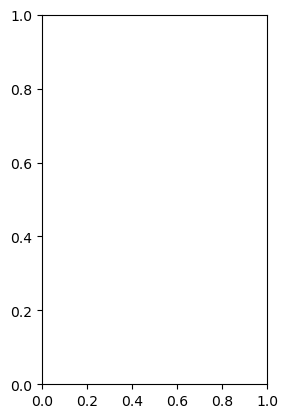

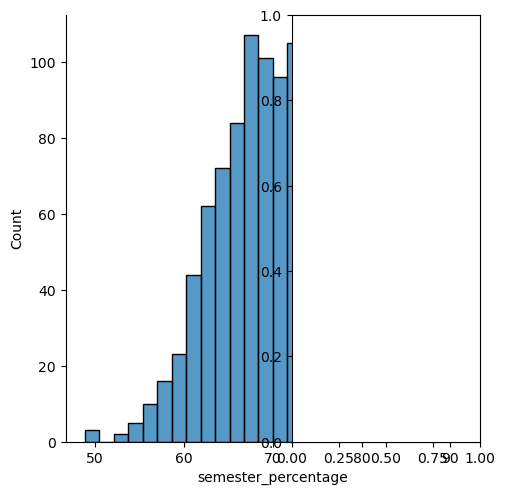

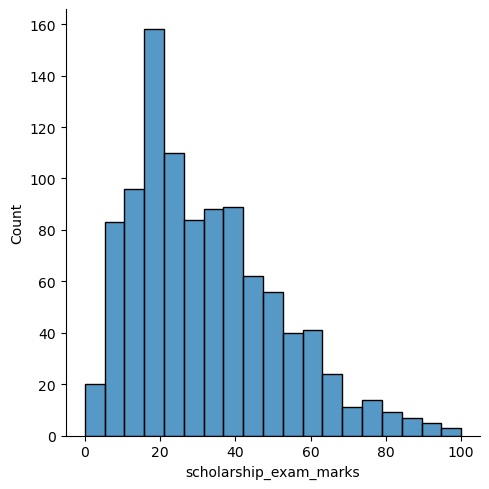

In [6]:
plt.subplot(1,2,1)
sns.displot(data['semester_percentage'])
plt.subplot(1,2,2)
sns.displot(data["scholarship_exam_marks"])
plt.show()

KeyError: 'z_score'

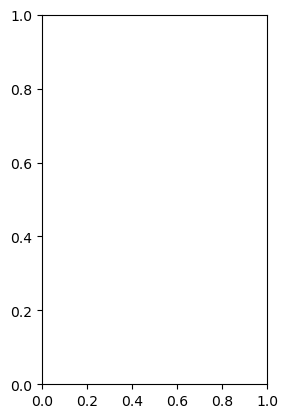

In [7]:
plt.subplot(1,2,2)
sns.displot(data["z_score"])
plt.show()

In [ ]:
print(f"Mean = {data["semester_percentage"].mean()}")
print(f"Std = {data["semester_percentage"].std()}")
print(f"Max = {data["semester_percentage"].max()}")
print(f"Min = {data["semester_percentage"].min()}")

In [ ]:
print(f"Highest Allowed = {data["semester_percentage"].mean() + 3*data["semester_percentage"].std()}")
print(f"Lowest Allowed = {data["semester_percentage"].mean() - 3*data["semester_percentage"].std()}")

In [ ]:
data[(data["semester_percentage"]< 51.13) | (data["semester_percentage"] > 88.08)]

## Triming

In [ ]:
data[(data["semester_percentage"]> 51.13) & (data["semester_percentage"] < 88.08)]

# Another method to trim
---:Z-Score:----
A z-score tells you how many standard deviations away a data point is from the mean of the distribution.
## Z = (x - mean)/std

In [ ]:
#using Z score only valid for normal distribution or bell shaped curve
data["z_score"] = (data["semester_percentage"] - data["semester_percentage"].mean())/data["semester_percentage"].std()

In [ ]:
data

In [ ]:
data[data["z_score"]<-3]

In [ ]:
data[data["z_score"]>3]

In [ ]:
data[(data["z_score"]>-3) & (data["z_score"]<3)]

## #capping

In [ ]:
upper_limit = data["semester_percentage"].mean()+ 3* data["semester_percentage"].std()
upper_limit

In [ ]:
lower_limit = data["semester_percentage"].mean()- 3* data["semester_percentage"].std()
lower_limit

In [ ]:
data["semester_percentage"] = np.where(data["semester_percentage"]>upper_limit, upper_limit,
                                      np.where(data["semester_percentage"]< lower_limit, lower_limit, data["semester_percentage"]))

In [ ]:
data